In [1]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

from common.yolo.ultralytics_structs import process_pose
from common.yolo.visualization import draw_skeletons, draw_facial_vectors_2D
from common.yolo.nms import nms_for_yolo_pose
from common.yolo.facial_orientation import detect_facial_vectors

# モデルのロード

In [2]:
# Load the YOLOv8n-Pose model
model = YOLO("/opt/models/yolo/yolov8n-pose.pt")

# Test whether the GPU device is available
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

# Move the model to the device
model.to(DEVICE)

YOLO(
  (model): PoseModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=

# 左右の顔の向きを検出

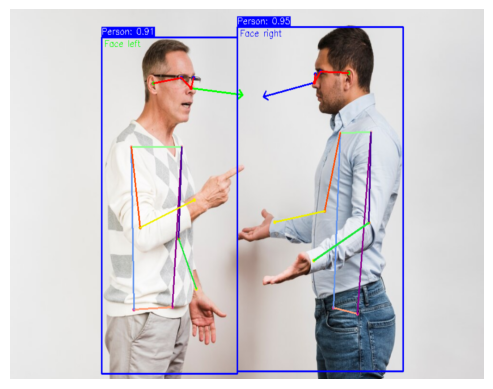

In [3]:
# Read the image
image = cv2.imread("/opt/images/arguing.png")

# Infer the image
results = model(image, verbose=False)[0]

# Process the pose
poses = process_pose(results)

# Apply NMS to the poses
poses = nms_for_yolo_pose(poses)

# Detect the facial vectors
facial_vectors = detect_facial_vectors(poses)

# Draw the facial vectors
draw_facial_vectors_2D(image, facial_vectors, True, True)

# Draw the skeletons
draw_skeletons(image, poses, show_names=False)

# Display the frame
image = cv2.resize(image, (1024, 800))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 正面向きを検出

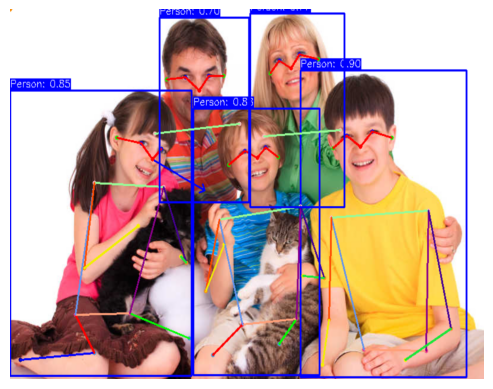

In [4]:
# Read the image
image = cv2.imread("/opt/images/human_and_pets.png")

# Infer the image
results = model(image, verbose=False)[0]

# Process the pose
poses = process_pose(results)

# Apply NMS to the poses
poses = nms_for_yolo_pose(poses)

# Detect the facial vectors
facial_vectors = detect_facial_vectors(poses)

# Draw the facial vectors
draw_facial_vectors_2D(image, facial_vectors)

# Draw the skeletons
draw_skeletons(image, poses, show_names=False)

# Display the frame
image = cv2.resize(image, (1024, 800))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 背面向きを検出

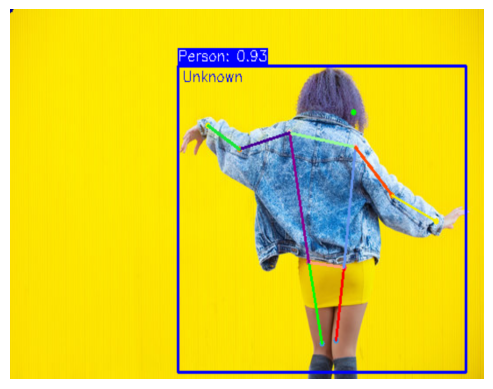

In [5]:
# Read the image
image = cv2.imread("/opt/images/turn_around.png")

# Infer the image
results = model(image, verbose=False)[0]

# Process the pose
poses = process_pose(results)

# Apply NMS to the poses
poses = nms_for_yolo_pose(poses)

# Detect the facial vectors
facial_vectors = detect_facial_vectors(poses)

# Draw the facial vectors
draw_facial_vectors_2D(image, facial_vectors, show_legend=True)

# Draw the skeletons
draw_skeletons(image, poses, show_names=False)

# Display the frame
image = cv2.resize(image, (1024, 800))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()